# Importing the libraries. 
### LinearRegression is imported to show the changes in the model in a more clear way.

In [4]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Loading the data of temperature changes from Kaggle.
### The data contains the temperature changes for many countries, but we should exctract the data for Turkey.
### Taking years after 1985 shows the changes in the temperature difference trends. Also, it helps to plot the data with the emission data later.


In [35]:
df = pd.read_csv('temperature.csv') # reading the data

df = df.loc[df['Country Name']=='Turkey'] # exctracting only Turkey
df = df.iloc[25:, 2:4] # taking years after 1985

df = df.reset_index(drop=True)# removing the index
t = df # for later use
df.head()

,year,tem_change
0,1986,0.412
1,1987,-0.411
2,1988,-0.320
3,1989,0.330
4,1990,-0.071


# Plotting the average temperature change by years in Turkey.
### Reshape is used for linear regression. The scatterplot is used with the best fit line to clearly show the trends in the data. 
### Horizontal line at 0 is also useful to show that most of the years (all after 1997) have a positive temperature change.

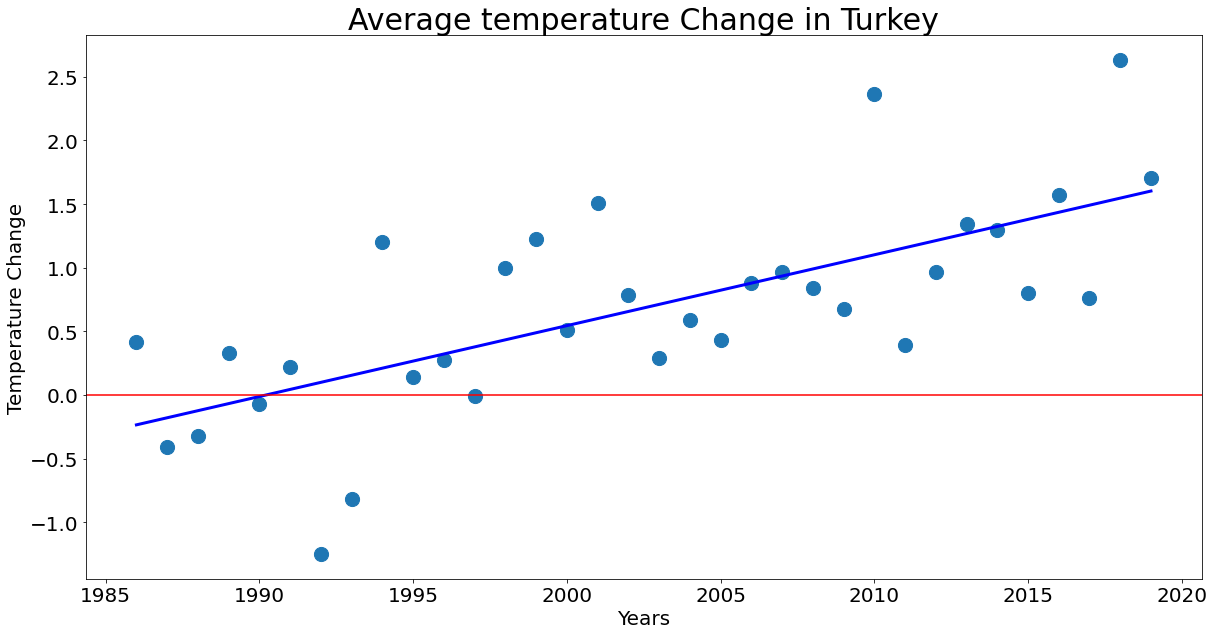

count    34.000000
mean      0.683588
std       0.803990
min      -1.251000
25%       0.278250
50%       0.718000
75%       1.151750
max       2.633000
Name: tem_change, dtype: float64

In [6]:
x = np.array(df['year']).reshape(-1, 1)
y = np.array(df['tem_change']).reshape(-1, 1)
# Applying linear regression
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Plotting the data
plt.figure(figsize=(20, 10))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.scatter(df['year'], df['tem_change'], s=200)
plt.plot(df['year'], y_pred, color='b', linewidth=3)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Temperature Change', fontsize=20)
plt.title('Average temperature Change in Turkey', fontsize=30)
# Horizaontal line
plt.axhline(y=0, color='r', linestyle='-')
plt.savefig('temp_change.png')
plt.show()
# Statistics of the data
df["tem_change"].describe()



### There is also statistical information about the data, where the mean is 0.68, std is 0.8, min is -1.25 and max is 2.63.

# Plotting the emission of CO2 by years in Turkey (Metric tons per capita) using dataset from Worldbank data.
### Here, we manually edited the data to get the emission data for Turkey and did the same steps as with the temperature data.

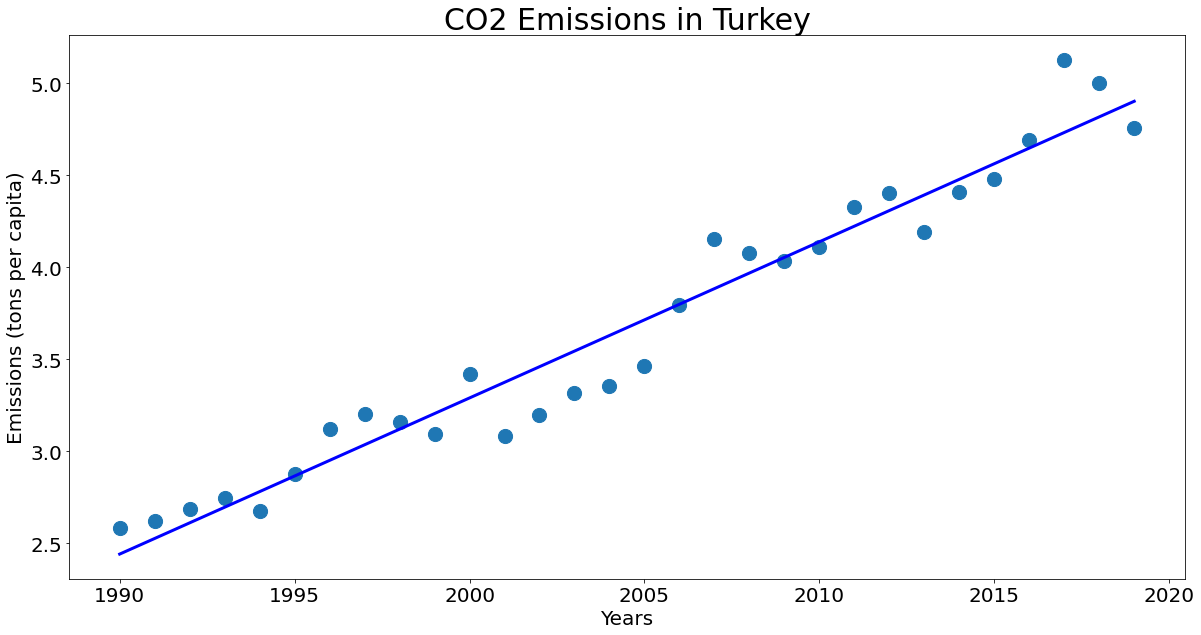

In [7]:
emission = pd.read_csv('emission.csv')

x = np.array(emission['Year']).reshape(-1, 1)
y = np.array(emission['Change']).reshape(-1, 1)
model.fit(x, y)
y_pred2 = model.predict(x) #predict the data and use the new variable y_pred2

#plot the data
plt.figure(figsize=(20, 10))
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('CO2 Emissions in Turkey', fontsize=30)
plt.scatter(emission['Year'], emission['Change'], s=200)
plt.plot(emission['Year'], y_pred2, color='b', linewidth=3)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Emissions (tons per capita)', fontsize=20)
plt.savefig('emission.png')
plt.show()


# Combining the two plots for a better comparison.
### We are using plt.twinx() to plot the two data in the same plot with two different y-axis.
### Emission data is plotted with red color and temperature data is plotted with blue color. We can see that they are both increasing over the years. However, the emission data is increasing faster.

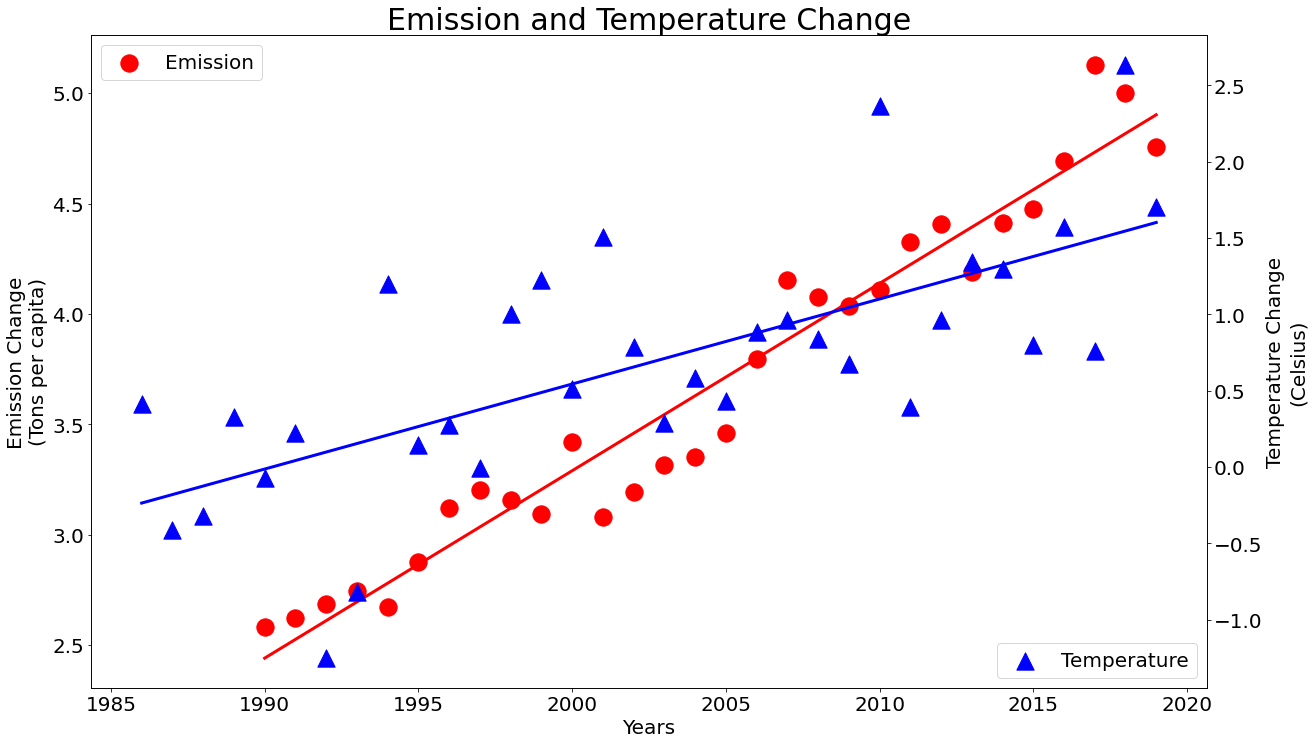

In [8]:
# Emmission
plt.figure(figsize=(20,12))
plt.title('Emission and Temperature Change', fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20) # increasing the size of the ticks
plt.plot(emission['Year'], y_pred2, color='r', linewidth=3) # horizontal line
plt.xlabel('Years', fontsize=20)
plt.ylabel('Emission Change\n(Tons per capita)', fontsize=20)
plt.scatter(emission.Year, emission.Change, color='r', label='Emission', s=300)
plt.legend(loc='upper left', fontsize=20) # adding legend

# Second y axis
plt.twinx() # creating a second y axis
plt.ylabel('Temperature Change\n(Celsius)', fontsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.plot(df['year'], y_pred, color='b', linewidth=3)
plt.scatter(df['year'], df['tem_change'], label='Temperature', s=300, color='b', marker='^')
plt.legend(loc='lower right', fontsize=20)

plt.show()

# Cleaning and preparing the agriculture data from TUIK.
### We cleaned the data manually by adding the new column of Product Category.
### The files are read and combined into one dataframe. They are already prepared, therefore we do not need to run the code below. It is just to show the steps.

In [ ]:
vegetables = pd.read_excel('vegetables.xlsx')# vegetables file
cer_crops = pd.read_excel('cereal_crops.xlsx')# crops file
fr_spices = pd.read_excel('fruits_spices.xlsx')# fruits and spices file

# Removing the Turkish version of the product names. 
# TR and EN are seperated by a "-" sign.
vegetables['Product Name'] = vegetables['Product Name'].str.split('-').str[1]
#remove spaces
vegetables['Product Name'] = vegetables['Product Name'].str.strip()

# Doing the same for the other two files
cer_crops['Product Name'] = cer_crops['Product Name'].str.split('-').str[1]
cer_crops['Product Name'] = cer_crops['Product Name'].str.strip()

fr_spices['Product Name'] = fr_spices['Product Name'].str.split('-').str[1]
fr_spices['Product Name'] = fr_spices['Product Name'].str.strip()

# Loading the combined agriculture data. 
### The data contains the agriculture production data for Turkey from 2018 to 2022. The data of 2022 is an *estimated data*. It has distinct categories of products with their production values that are widely spread. Horizontal bars are used due to the high number of categories.
### *That is why plots are divided to smaller parts*
### Therefore, we are using three different plots to show the data in a more clear way. All of the numerical data is in tonnes. Years are increasing from the bottom to the top. The categories are sorted by the sum of their production values by year of 2020.

In [9]:
df = pd.read_excel('data.xlsx')
df.head(10)

,Product Category,Product Name,2018,2019,2020,2021,2022
0,Cereals,Wheat,20000000,19000000,20500000,17650000.0,19750000
1,Cereals,Maize,5700000,6000000,6500000,6750000.0,8300000
2,Cereals,Rice in the husk,940000,1000000,980000,1000000.0,950000
3,Cereals,Barley,7000000,7600000,8300000,5750000.0,8500000
4,Cereals,Rye,320000,310000,295681,200000.0,273000
5,Cereals,Oats,260000,265000,314528,276000.0,365000
6,Cereals,Spelt,13071,3006,2820,4069.0,3444
7,Cereals,Millet,4397,4765,5711,4320.0,3877
8,Cereals,Canary grass,1228,3839,12551,6059.0,4564
9,Cereals,Triticale,170000,215090,276212,228000.0,320000


# First plot has the categories with the highest production values. 
### In the shown 7 categories, only citrus is decreasing over the last 5 years. Production of the most categories are slightly increasing, but the Fresh Fruit production is increasing faster than others. Fresh Fruits include apples, pears, berries, pomegranates, apricots, peaches, etc.

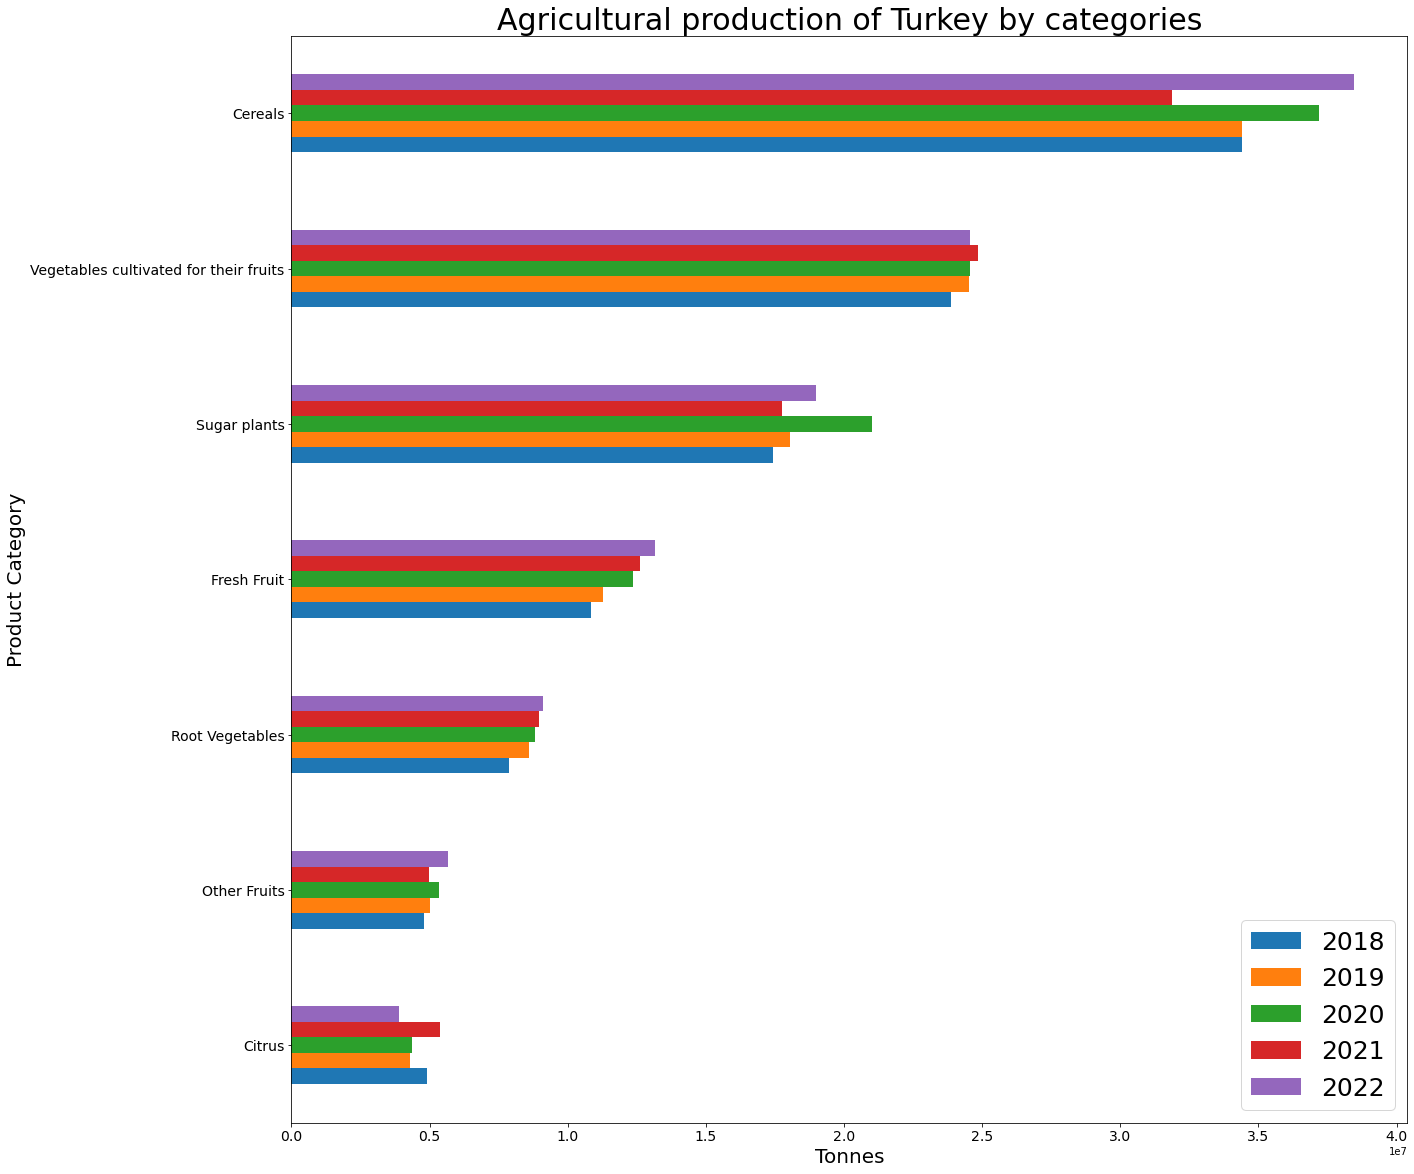

In [10]:
df.groupby('Product Category').sum().sort_values(by=2020).iloc[-7:].plot(kind='barh', figsize=(20,20), ylabel='Tonnes').legend(fontsize=25)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Agricultural production of Turkey by categories', fontsize=30)
plt.ylabel('Product Category', fontsize=20)
plt.xlabel('Tonnes', fontsize=20)
plt.show()

# Second plot has the categories that are between the highest and the lowest production values.
### We can see that except for  the plants for textile and Spices Crops & Tea, all of the categories are increasing over the last 5 years. However, Dry pulses production dropped in 2021 and esitmated to drastically increase in 2022. Production estimations are optimistic for textile raws with olive and nuts.
### While Spices Crops & Tea produciton decreasing over the last 5 years, production of the plants for textile initially decreased, but it started to increase in 2021.

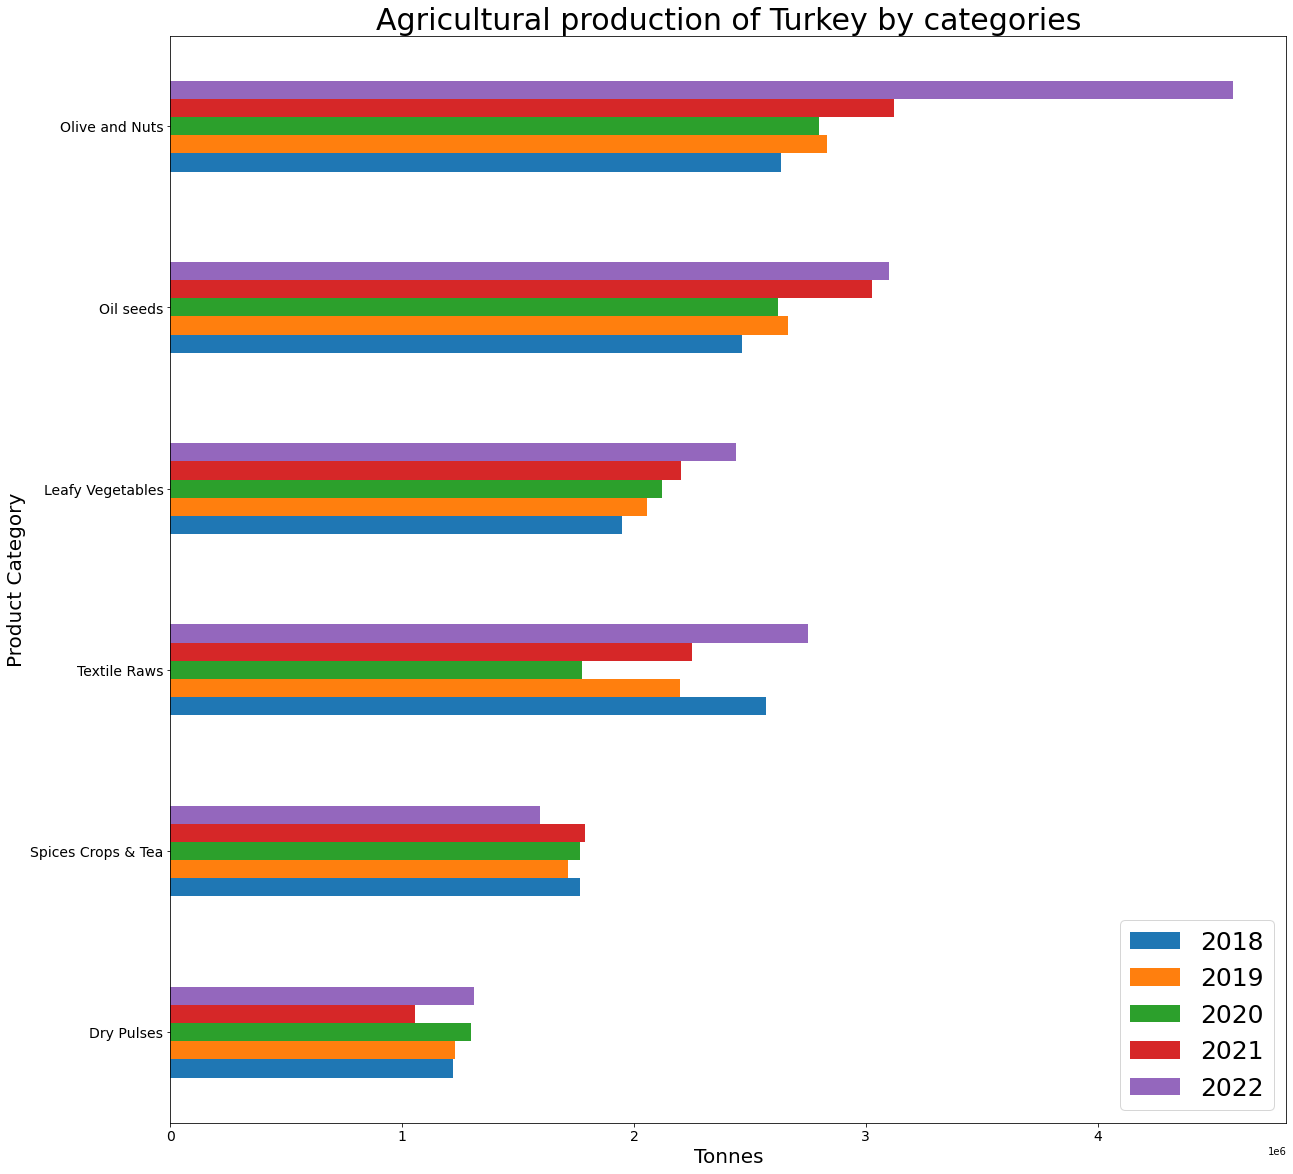

In [11]:
df.groupby('Product Category').sum().sort_values(by=2020).iloc[3:-7].plot(kind='barh', figsize=(20,20), ylabel='Tonnes').legend(fontsize=25)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Agricultural production of Turkey by categories', fontsize=30)
plt.ylabel('Product Category', fontsize=20)
plt.xlabel('Tonnes', fontsize=20)
plt.show()

# Third plot
### This plot contains information about Leguminous vegetables (beans, peas, lentils, etc.), Mushrooms and plants used for perfumery and pharmacy. Given three categories of the products have the lowest production values compared to other categories.
### Out of these three categories, only *mushrooms* are increasing over the given time period. The other two categories have a decreasing trend.

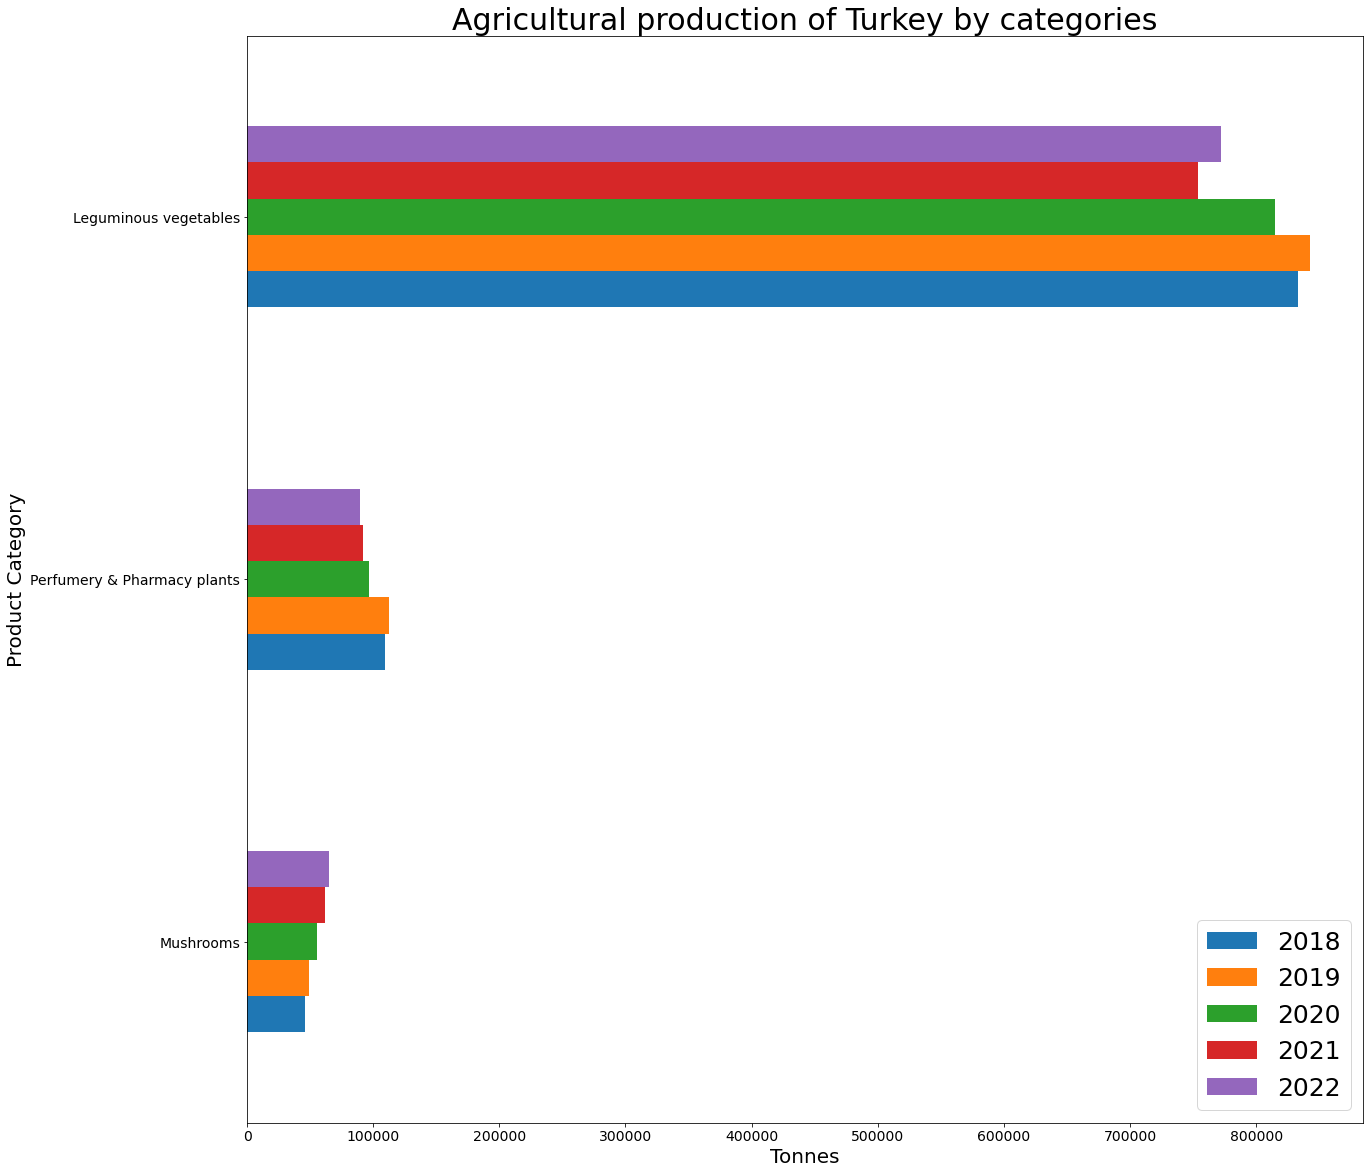

In [12]:
df.groupby('Product Category').sum().sort_values(by=2020).iloc[0:3].plot(kind='barh', figsize=(20,20), ylabel='Tonnes').legend(fontsize=25)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Agricultural production of Turkey by categories', fontsize=30)
plt.ylabel('Product Category', fontsize=20)
plt.xlabel('Tonnes', fontsize=20)
plt.show()

# Comments
### Citruses, perfumery and pharmacy plants, leguminous vegetables and Spices Crops & Tea are decreasing over the last 5 years. Therefore, we can make an assumption that they are not resistant to the increasing temperature and they are not benefit from CO2 emission. CO2 and temperature is only increasing in the last years and it is the reason that we are making this assumption. There may be other factors contributing to the decreasing trend of these categories (changes in the market, changes in the demand, economically unfeasible, etc.).
### Other groups of products are increasing, which means that there is a chance that they are resistant to the increasing temperature and benefit from CO2 emission. However, there are also many other factors affecting that (such as the focus on some product categories, the use of pesticides, etc.)

# Additional data to the agriculture data. 2002, 2011 and 2012 statistics.
### The data has a little different product categories. But we changed them according to the previous data.
### This data is useful to see the overall changes before 2018. Although, the data is not very useful for predictions, as the time between x values vary.

In [13]:
df = pd.read_excel('data2.xlsx')
df.head()
# getting rid of dots in the column 2002
#df[2002] = df[2002].str.replace('.', '')
#df[2011] = df[2011].str.replace('.', '')
#df[2012] = df[2012].str.replace('.', '')

,Product Category,Product Name,2002,2011,2012
0,Cereals,Wheat,19500000,21800000,20100000
1,Cereals,Corn,2100000,4200000,4600000
2,Cereals,Paddy,360000,900000,880000
3,Cereals,Barley,8300000,7600000,7100000
4,Cereals,Rye,255000,365750,370000


# First plot has the categories with the highest production values.
### Root Vegetables production decreased in 2012 and 2011, showing the highest value in 2002. Cereals production increased according to the data of 2011, but started to decrease in 2012.

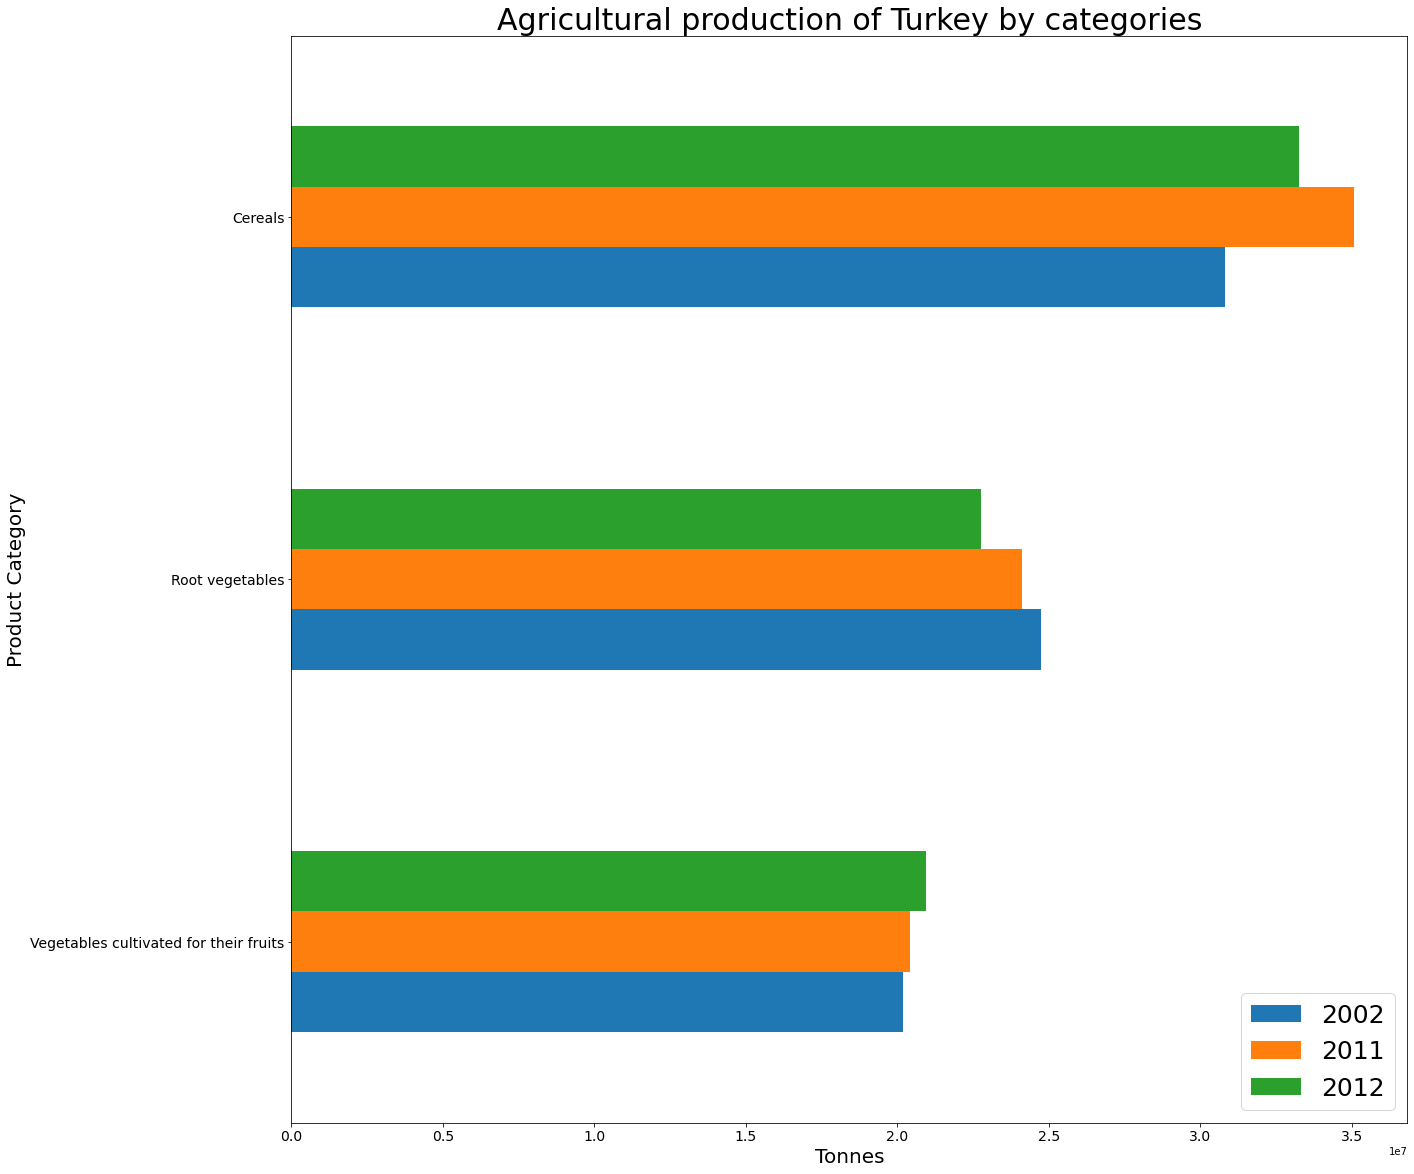

In [14]:
df.groupby('Product Category').sum().sort_values(by=2011).iloc[6:].plot(kind='barh', figsize=(20,20), ylabel='Tonnes').legend(fontsize=25)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Agricultural production of Turkey by categories', fontsize=30)
plt.ylabel('Product Category', fontsize=20)
plt.xlabel('Tonnes', fontsize=20)
plt.show()

# Second plot has the categories that are between the highest and the lowest production values.
### Oil seeds production highly increased in 2011 and 2012. Textile raws and leafy vegetables production decreased from 2002.

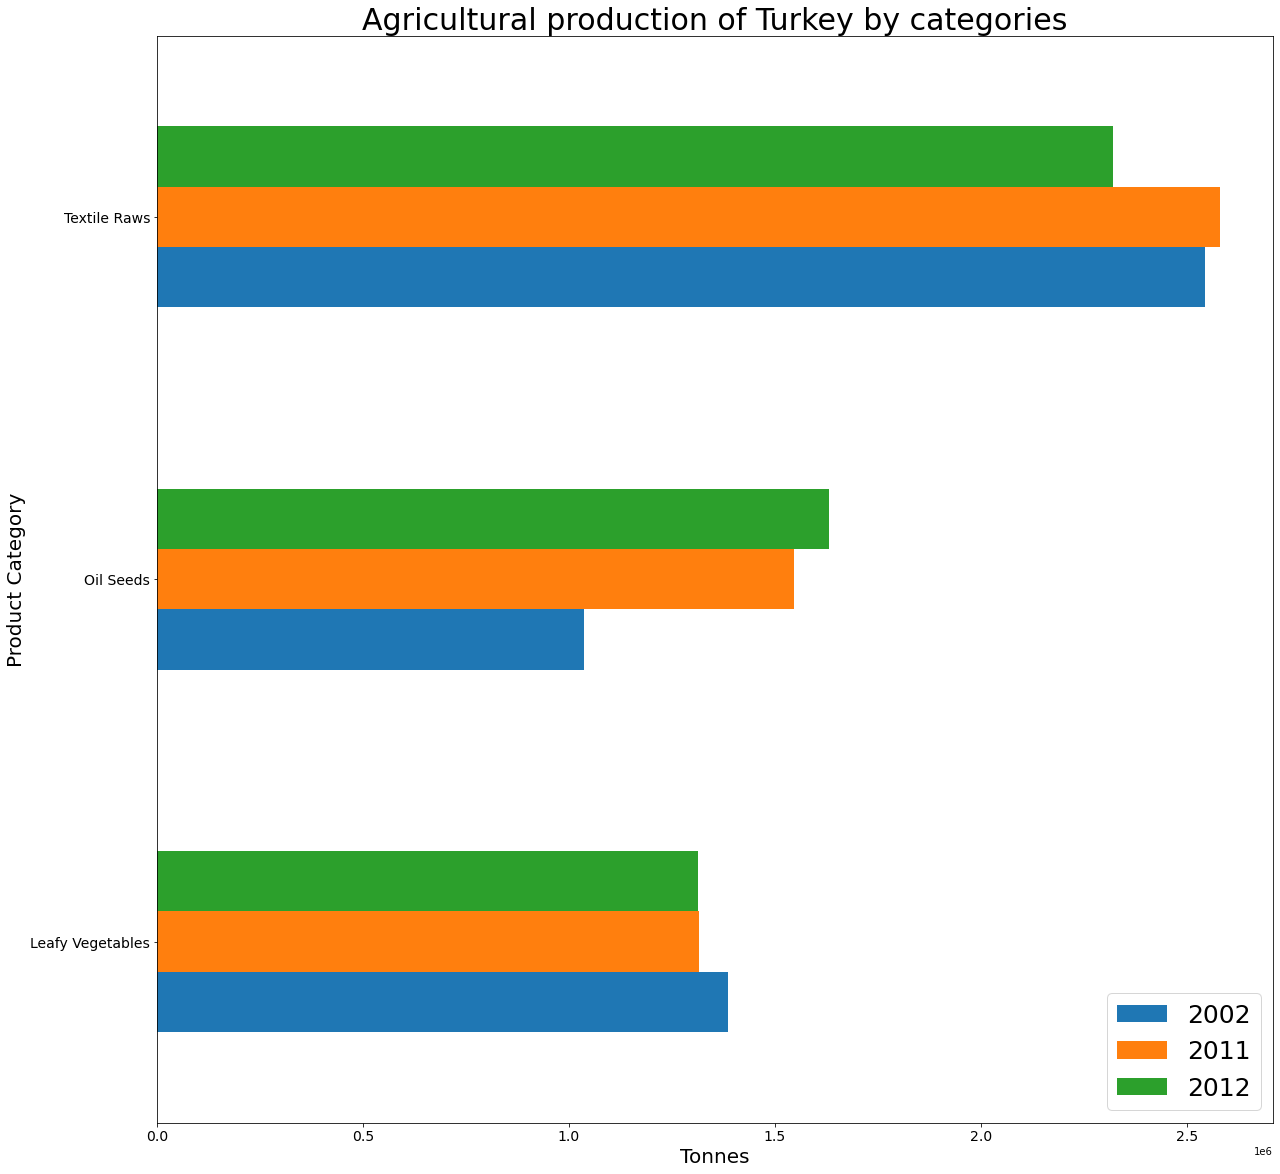

In [15]:
df.groupby('Product Category').sum().sort_values(by=2011).iloc[3:6].plot(kind='barh', figsize=(20,20), ylabel='Tonnes').legend(fontsize=25)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Agricultural production of Turkey by categories', fontsize=30)
plt.ylabel('Product Category', fontsize=20)
plt.xlabel('Tonnes', fontsize=20)
plt.show()

# Third plot has the categories with the lowest production volume.
### We can observe that the production has decreased in 2012 compared to 2002 for all three groups.

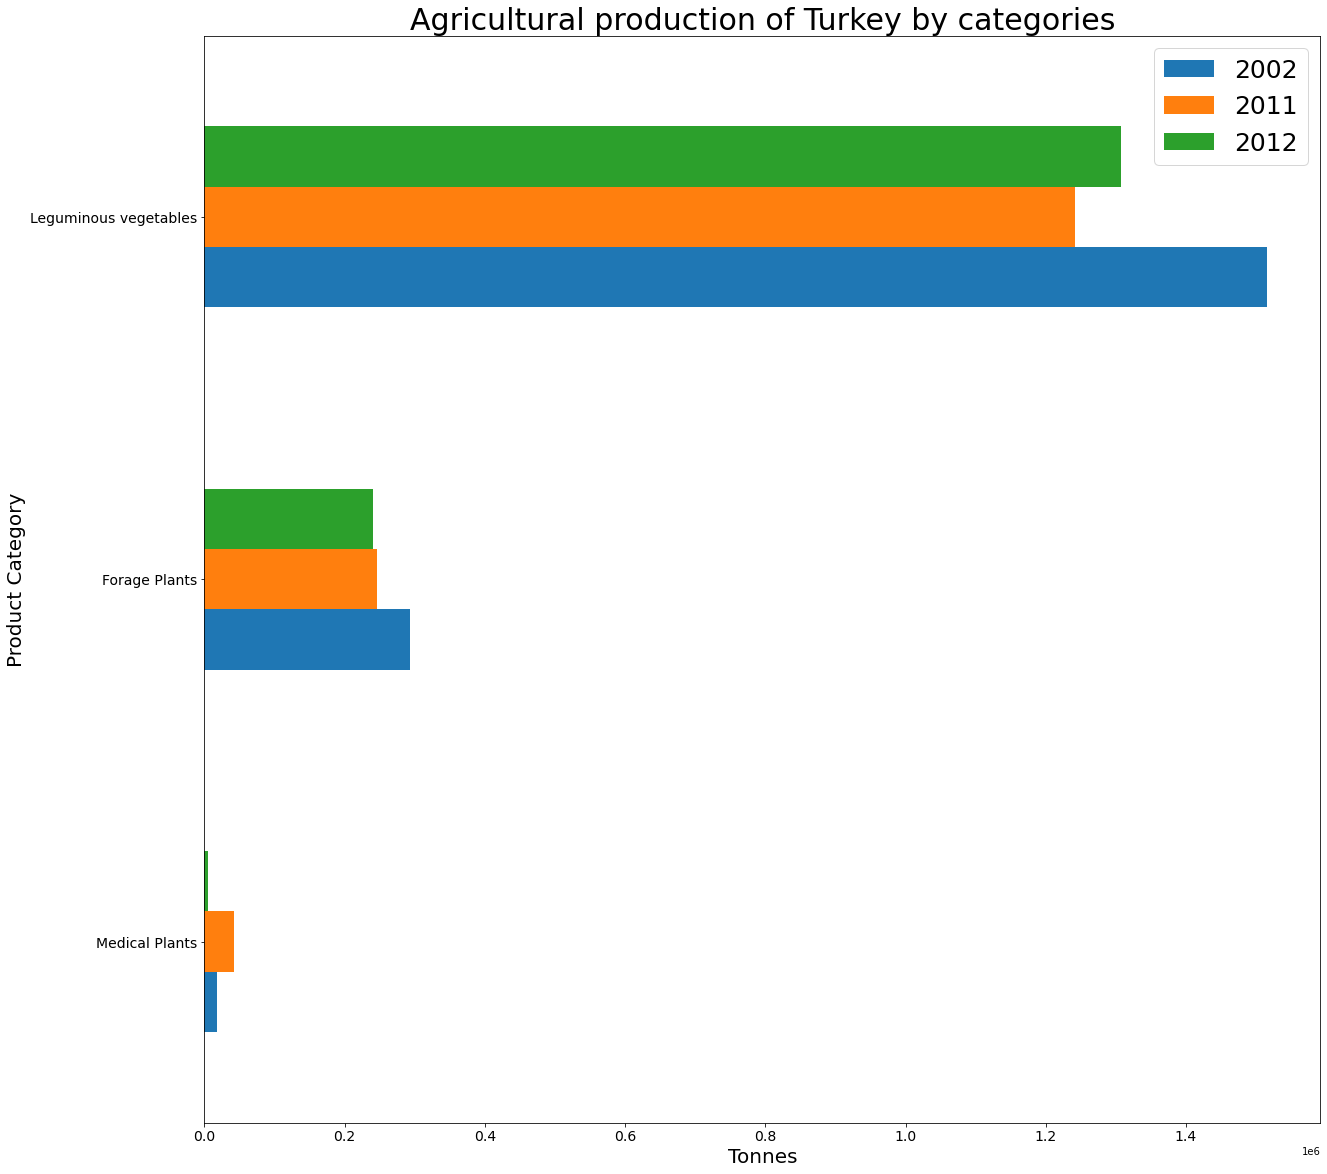

In [16]:
df.groupby('Product Category').sum().sort_values(by=2011).iloc[0:3].plot(kind='barh', figsize=(20,20), ylabel='Tonnes').legend(fontsize=25)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Agricultural production of Turkey by categories', fontsize=30)
plt.ylabel('Product Category', fontsize=20)
plt.xlabel('Tonnes', fontsize=20)
plt.show()

# Comments
### Root vegetables, Forage plants, leguminous and leafy vegetables, textile raws and medical plants have a decreasing trend. According to the emission and temperature data, we may assume that this groups of products are not resistant to the increasing temperature and do not benefit from CO2 emission. Nevertheless, we agree that there are a lot of other factors that may affect the production of these products.
### Other groups of products are increasing, which means that there is a chance that they are resistant to the increasing temperature and benefit from CO2 emission. However, there are also many other factors affecting that (such as the focus on some product categories, the use of pesticides, etc.)

# Research Questions and Proposed tests
## Simple research questions and answers.
#### 1. What are the effects of the Climate Change on the agriculture of Turkey?
#### Some categories of the crops are showing decreasing trends even if technologies are improving to increase the production. These categories include citrus, perfumery and pharmacy plants, leguminous vegetables and Spices Crops & Tea.
#### 2. Is there any positive correlation between the CO2 emission rate and production of specific categories of crops?
#### We can see that the production of some categories are increasing over the years. These categories include Fresh Fruits, Oil seeds, Mushrooms, etc. Due to the fact that CO2 emission is only increasing, there is a positive correlation between these groups and CO2 emission rate.

## One research question tested.
### 3. Is there any relationship between temperature change and emission rate?
### Null hypothesis: There is no relationship between temperature change and emission rate.
### Alternative hypothesis: There is a relationship between temperature change and emission rate.
#### We are using pearsonr function of scipy.stats for hypothesis test because it returns correlation (-1 to 1) and p-value and helps to determine whether there is a linear relationship between two variables. 
#### We will use the data of years that are in both datasets (1990-2019). 

In [52]:
t = t[t['year'] >= 1990] # to set the length of the dataframes to be the same
t.describe()

,year,tem_change
count,30.000000,30.000000
mean,2004.500000,0.774367
std,8.803408,0.802579
min,1990.000000,-1.251000
25%,1997.250000,0.316000
50%,2004.500000,0.793500
75%,2011.750000,1.221500
max,2019.000000,2.633000


In [53]:
emission.describe()

,Change,Year
count,30.000000,30.000000
mean,3.671423,2004.500000
std,0.766870,8.803408
min,2.581518,1990.000000
25%,3.099436,1997.250000
50%,3.441335,2004.500000
75%,4.292185,2011.750000
max,5.127197,2019.000000


Pearsons correlation: 0.61047
p-value: 0.00034


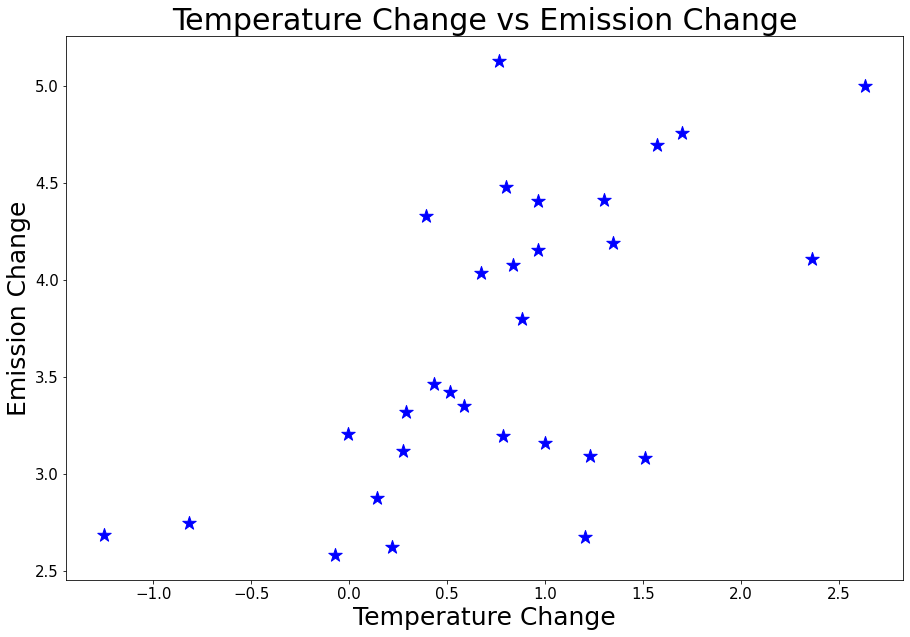

In [50]:
from scipy.stats import pearsonr


correlation, pvalue = pearsonr(t['tem_change'], emission['Change'])

print('Pearsons correlation: %.5f' % correlation)
print('p-value: %.5f' % pvalue)

plt.figure(figsize=(15,10))
plt.scatter(t['tem_change'], emission['Change'], s=200, color='blue', marker='*')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Temperature Change', fontsize=25)
plt.ylabel('Emission Change', fontsize=25)
plt.title('Temperature Change vs Emission Change', fontsize=30)
plt.show()


# Comments
### We can see that there is a positive correlation between temperature change and emission rate. The correlation is 0.61, which is closer to 1 (moderate correlation). The p-value is 0.00034, which is less than default alpha value of 0.05. Therefore, we can reject the null hypothesis and accept the alternative hypothesis. There is a relationship between temperature change and emission rate.

## At least three more research quesitons.
### 1. Which products are benefitting from the increasing temperature and CO2 emission?
### We think that machine learning may be helpful to identify the exact crop names that are benefitting from this conditions. It may be useful to grow more of them in the future due to the climate change. Classification algorithms may be used to identify the products that are growing well under the conditions of high temperature and gas emission. For testing methods, we believe that k-fold cross validation may be used to test the accuracy of the model.
### 2. How to increase the efficiency of the agriculture in terms of economy and environment? 
### Data of the prices and data about ecology may be used to find the answer to this question. We can use regression algorithms to find the relationship between the prices and ecological conditions in Turkey. For testing methods, we believe that R2 test and mean absolute error may be used to test the accuracy of the model.
### 3. Which crops are going to be more profitable in the future under the conditions of climate change?
### This question is very complex, as we need more information to answer it. Due to the fact that there are a lot of features to consider if we want to use machine learning methods, we think that decision tree algorithms may be helpful. We can also try random forest algorithms as they are an extension of decision trees. Testing methods that can be used include accuracy, precision, recall, F1 score, etc.